<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_6_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple linear regression

Consider you have training data $\{(x_1,y_1),\cdots,(x_n,y_n)\}$ and you want find a line 

$$
y(x)=a+bx
$$

that fits your data the best. To determine the best parameters $a$ and $b$ we use a measure of discrepancy between  the observed outputs and the linear regression fit such as the sum squared training error. This is also called ordinary least squares and minimises the average vertical projection of the points y to fitted line:

$$
E(a,b)=\sum_{i=1}^n(y_i-y(x_i))^2=\sum_{i=1}^n(y_i-a-bx_i)^2.
$$

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/lines.png)

Our task is to find the parameters a and b that minimise $E(a, b)$. 
BTW this function is called error function or fit function or loss function.

We are seeking for

$$
\text{argmin}_{a,b} \, E(a,b)
$$

Note that we could have chosen for example

$$
E_{LAD}(a,b)=\sum_{i=1}^n|y_i-y(x_i)|.
$$

It's called Least absolute deviations (LAD) regression.

You could choose

$$
E_k(a,b)=\sum_{i=1}^n(y_i-y(x_i))^k.
$$

In fact we can choose distances in a completely different way 

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_45_statistics/l.png)

These $E$s would render different results. We chose quadratic function (hence least-squars method name) because we can find its minimum analytically.

Later we will find it useful to add extra term to $E(a,b)$ (regularization). 

Differentiating with respect to $a$ and $b$ we obtain

$$
\begin{aligned}
\frac{\partial}{\partial a}E(a,b)&=-2\sum_{i=1}^n(y_i-a-bx_i) \\
\frac{\partial}{\partial b}E(a,b)&=-2\sum_{i=1}^n(y_i-a-bx_i)x_i \\
\end{aligned}
$$

Dividing by $N$ and equating to zero, the optimal parameters are given from the solution to the two linear equations

$$
\begin{aligned}
&\langle{y}\rangle-a-b\langle{x}\rangle=0 \\
&\langle{xy}\rangle-a\langle{x}\rangle-b\langle{x^2}\rangle=0
\end{aligned}
$$

Solving this we obtain

$$
\begin{aligned}
a&=\langle{y}\rangle-b\langle{x}\rangle \\
b&=\frac{\langle{xy}\rangle-\langle{x}\rangle\langle{y}\rangle}{\langle{x^2}\rangle-\langle{x}\rangle^2}.
\end{aligned}
$$

Expression for $b$ could be rewritten as

$$
b=\frac{Cov(x,y)}{s_u(x)}=\rho(x,y)\frac{\sigma_y}{\sigma_x}
$$

Where
* $Cov$ and $s_u$ are uncorrected(biased) sample cavariance and variance;
* $\sigma$ is uncorrected(biased) sample standard deviation;
* $\rho$ is the sample correlation coefficient.

Let me remind that
$$
\rho(x,y)=\frac{\sigma(x,y)}{\sigma_x \sigma_y}.
$$

The coefficient of determination ("$R$ squared") is equal to $\rho^2$. This is a statistical measure of how well the regression predictions approximate the real data points. An $R^2$ of $1$ indicates that the regression predictions perfectly fit the data.

Its easy to show that regression line always passes through the center of mass of the point cloud - the point $(\langle x \rangle, \langle y \rangle)$.
 




#Get-your-hands-dirty example

Let's do simple example by hand to get a feel of the method.
Suppose you have data $\{(1,1),(2,4),(4,5)\}$.
We have to calculate a bunch of averages.

$$
\begin{aligned}
\langle{x}\rangle &=\langle{\{1,2,4\}}\rangle=\frac{1+2+4}{3}=2.33, \\
\langle{y}\rangle &=\langle{\{1,4,5\}}\rangle=\frac{1+4+5}{3}=3.33, \\
\langle{xy}\rangle &=\langle{\{1\times 1,2\times 4,4\times 5\}}\rangle=\frac{1+8+20}{3}=9.66, \\
\langle{x^2}\rangle &=\langle{\{1,2^2,4^2\}}\rangle=\frac{1+4+16}{3}=7. 
\end{aligned}
$$

Now we obtain

$$
\begin{aligned}
b&=\frac{\langle{xy}\rangle-\langle{x}\rangle\langle{y}\rangle}{\langle{x^2}\rangle-\langle{x}\rangle^2}=\frac{9.66-2.33\times 3.33}{7-2.33^2}=1.21, \\
a&=\langle{y}\rangle-b\langle{x}\rangle=3.33-1.21\times 2.33=0.51.
\end{aligned}
$$


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

model = LinearRegression(fit_intercept=True)
x=np.array([1,2,4]).reshape(-1,1)
y=np.array([1,4,5]).reshape(-1,1)
model.fit(x,y)
print("Model slope b     = ", model.coef_[0])
print("Model intercept a = ", model.intercept_)

Model slope b     =  [1.21428571]
Model intercept a =  [0.5]


#Simple Linear Regression

Here are $50$ points that fit a line $2x-5$ with somewhat randomeness added.

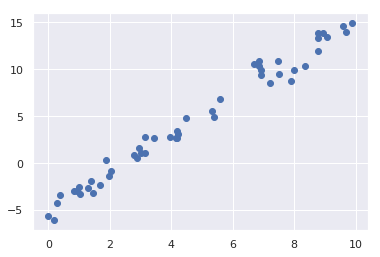

In [0]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

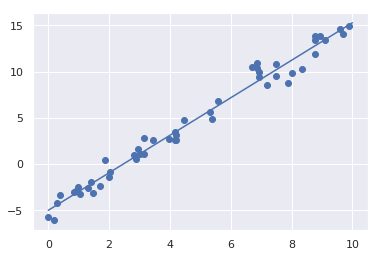

In [0]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [0]:
print("Model slope     = ", model.coef_[0])
print("Model intercept = ", model.intercept_)
print("R**2            = ", model.score(x.reshape(-1, 1),y))

Model slope     =  2.0272088103606953
Model intercept =  -4.998577085553204
R**2            =  0.9790800609430612


We successfully obtained parameters of the line. The $R^2=0.97$ tells us that the fit is pretty good.

R**2            =  0.008360528541052514


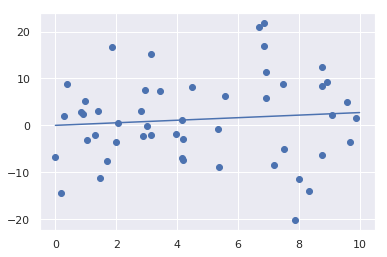

In [0]:
rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = 10*rng.randn(50)
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);
print("R**2            = ", model.score(x.reshape(-1, 1),y))


$R^2$ is almost $0$ as expected.

Now let's reflect all points in the x-axis:

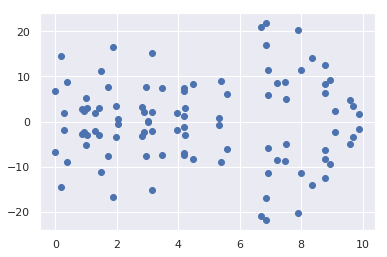

In [0]:
x=np.concatenate((x,x))
y=np.concatenate((y,-y))
plt.scatter(x, y)

Can you guess what the value of the coefficient of determination will be?

R**2            =  0.0


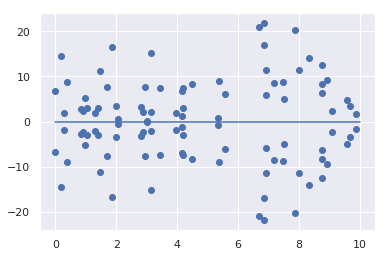

In [0]:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);
print("R**2            = ", model.score(x.reshape(-1, 1),y))

#Polylinear regression

Here is an example of polylinear regression.

Find the hyperline

$$
y(x_1, \cdots, x_n)=a_1x_1+a_2x_2+\cdots+a_nx_n+b \\
y(\mathbf{x})=\mathbf{a}^{\top} \mathbf{x}+b
$$

that fits sample $\{(\mathbf{x}_i;y_{i})\}$.

In [0]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print("b = ", model.intercept_)
print("a = ", model.coef_)

b =  0.50000000000001
a =  [ 1.5 -2.   1. ]


#Regression for any basis

We can generalize even more

$$
y(\mathbf{x})=\mathbf{w}^{\top} \boldsymbol\phi(\mathbf{x})
$$

where $\phi(\mathbf{x})$ is a vector valued function of the input vector $\mathbf{x}$.
For example, in the case of a straight line fit, with a scalar input and output, we have

$$
\phi(\mathbf{x})=(1,x)^{\top}, \qquad \mathbf{w}=(a,b)^{\top}.
$$

We define the train error as the sum of squared differences between the observed outputs and the predictions under the linear model:

$$
E(\mathbf{w})=\sum_{i=1}^n(y_i-\mathbf{w}^{\top} \boldsymbol{\phi}_i))^2
$$


where $\boldsymbol{\phi}_i=\phi(\mathbf{x}_i)$.

We now wish to determine the parameter vector $\mathbf{w}$ that minimizes $E(\mathbf{w})$.

$$
\mathbf{w}=\left(\sum_{i=1}^n \boldsymbol{\phi}_i \boldsymbol{\phi}_i^{\top}\right)^{-1}\sum_{i=1}^n y_i \boldsymbol{\phi}_i
$$

Example: A cubic polynomial fit
If 

$$
y(x)=w_1+w_2x+w_3x^2+w_4x^3
$$ 

we have

$$
\boldsymbol{\phi}(x)=(1,x,x^2,x^3)^{\top}
$$.

It is also straightforward to generalise the above framework to vector outputs $\mathbf{y}$.


#Basis Function Regression Example

##Polynomial basis functions

Let

$$
\boldsymbol{\phi}(x)=(1,x,x^2,x^3)^{\top}
$$.

In [0]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Let's choose

$$
\boldsymbol{\phi}(x)=(1,x,x^2,x^3,x^4,x^5,x^6,x^7)^{\top}
$$.

In [0]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

We have $50$ points generated by the $\sin$ fucntion with some random noise added.

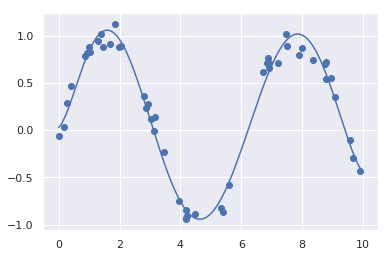

In [0]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

##Gaussian basis functions

Of course, other basis functions are possible. For example, one useful pattern is to fit
a model that is not a sum of polynomial bases, but a sum of Gaussian bases. 

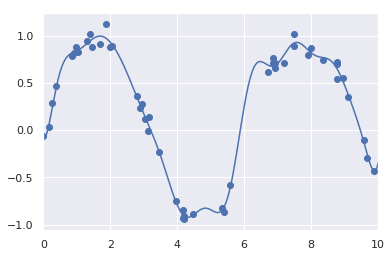

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
  """Uniformly spaced Gaussian features for one-dimensional input"""
  
  def __init__(self, N, width_factor=2.0):
    self.N = N
    self.width_factor = width_factor

  @staticmethod
  def _gauss_basis(x, y, width, axis=None):
    arg = (x - y) / width
    return np.exp(-0.5 * np.sum(arg ** 2, axis))

  def fit(self, X, y=None):
    # create N centers spread along the data range
    self.centers_ = np.linspace(X.min(), X.max(), self.N)
    self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
    return self
  
  def transform(self, X):
    return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

  
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

We put this example here just to make clear that there is nothing magic about poly‐
nomial basis functions: if you have some sort of intuition into the generating process
of your data that makes you think one basis or another might be appropriate, you can
use them as well.

#Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to overfitting. For example, if we choose too many Gaussian basis functions, we end up with results that don’t look so good

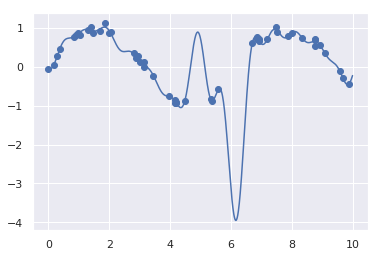

In [0]:
# overfitting
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

With the data projected to the $30$-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data. We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations

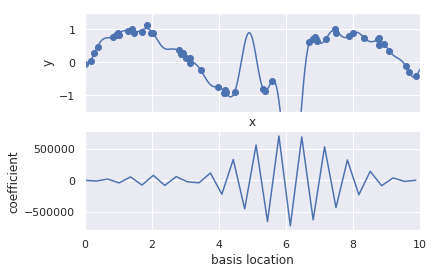

In [0]:
def basis_plot(model, title=None):
  fig, ax = plt.subplots(2, sharex=True)
  model.fit(x[:, np.newaxis], y)
  ax[0].scatter(x, y)
  ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
  ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
  if title:
    ax[0].set_title(title)
  ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
  ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10))
    
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

The lower panel shows the amplitude of the basis function at each
location. This is typical overfitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out. We know that such behavior is problematic, and it would be nice if we could limit such spikes explicitly in the model by penalizing large values of the model parameters. Such a penalty is known as regularization, and comes in several forms.

##Ridge regression ($L_2$ regularization)

Perhaps the most common form of regularization is known as ridge regression or $L_2$
regularization, sometimes also called Tikhonov regularization. This proceeds by penal‐
izing the sum of squares (2-norms) of the model coefficients; in this case, the penalty
on the model fit would be:

$$
E_2 = \alpha \sum w_i^2.
$$

Total fit function is now

$$
E=E(a,b)+E_2.
$$

α is a free parameter that controls the strength of the penalty. This type of
penalized model is built into Scikit-Learn with the Ridge estimator



In [0]:
from sklearn.linear_model import Ridge

model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

NameError: ignored

*  $\alpha \to 0$ --- original linear regression
*  $\alpha \to \infty$ --- regression totally suppressed
*  it can be computed very efficiently—at hardly more computational cost than the original linear regression model

##Regression vs Ridge regression

Suppose you generate random points and use Simple regression and regression with Ridge regularization. If we are seeking equation

$$
y(x)=a+bx
$$

Ridge penalty reads as

$$
E_2 = \alpha \, b^2.
$$

It means it prefers low line slopes. The more is $\alpha$ the more shelved our line will be.

In general Ridge regression penalizes high slopes of the regression hyperplane.

In [0]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

rng = np.random.RandomState(1)
x = 10 * rng.rand(20)
y = 2 * x - 5 + 5*rng.randn(20)

def regression_compare(a):
  model = LinearRegression(fit_intercept=True)
  model.fit(x[:, np.newaxis], y)
  model_ridge=make_pipeline(Ridge(alpha=a))
  model_ridge.fit(x[:, np.newaxis], y)
  xfit = np.linspace(0, 10, 1000)
  yfit = model.predict(xfit[:, np.newaxis])
  yfit_ridge = model_ridge.predict(xfit[:, np.newaxis])
  plt.scatter(x, y);
  plt.plot(xfit, yfit);
  plt.plot(xfit, yfit_ridge);
  plt.legend(['Simple regression', 'Ridge regression'])

widgets.interact(regression_compare,
    a = widgets.FloatSlider(min=0.0, max=1000.0, description='alpha =', value=0.0));

interactive(children=(FloatSlider(value=0.0, description='alpha =', max=1000.0), Output()), _dom_classes=('wid…

##Lasso regularization ($L_1$ regularization)

Another very common type of regularization is known as lasso, and involves penaliz‐
ing the sum of absolute values (1-norms) of regression coefficients:

$$
E_1 = \alpha \sum |w_i|.
$$

Total fit function is now

$$
E=E(a,b)+E_1.
$$

Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor sparse models where possible; that is, it preferentially sets model coefficients to exactly zero.

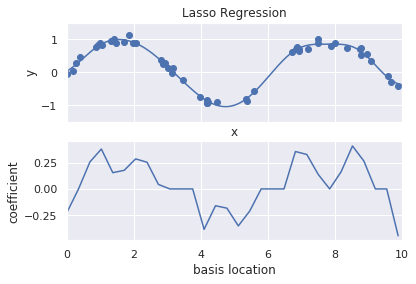

In [0]:
from sklearn.linear_model import Lasso

model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001, tol=0.01))
basis_plot(model, title='Lasso Regression')

#Example: Predicting Bicycle Traffic

As an example, let’s take a look at whether we can predict the number of bicycle trips
across Seattle’s Fremont Bridge based on weather, season, and other factors.

![fremont](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_3/map_fremont.png)
![fremont bridge](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/202796_7-16LO3055_182055-780x503.jpg)

In [0]:
# taken from
# https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00024233/detail
# and
# https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/fremont_bridge.csv
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/fremont_weather.csv

In [0]:
import pandas as pd

counts = pd.read_csv('fremont_bridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('fremont_weather.csv', index_col='DATE', parse_dates=True)
counts.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-06-30 23:00:00,7.0,15.0
2019-06-30 22:00:00,20.0,30.0
2019-06-30 21:00:00,31.0,32.0
2019-06-30 20:00:00,72.0,58.0
2019-06-30 19:00:00,58.0,77.0


We see that we have numbers of cyclist that cross the bridge in both directions indexed by the date. We sum these numbers to get the total number of cyclist in both directions.


In [0]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns
daily.head()

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


We attach $7$ one more columns to indicate the day of the week.

In [0]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
  daily[days[i]] = (daily.index.dayofweek == i).astype(float)

We add one more column to account the national holidays.

In [0]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

Now we want to add column with hours of daylight which we calculate from the well-known astronomical formula.

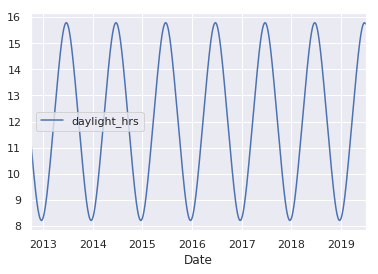

In [0]:
import numpy as np

def hours_of_daylight(date, axis=23.44, latitude=47.61):
  """Compute the hours of daylight for the given date"""
  days = (date - pd.datetime(2000, 12, 21)).days
  m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
  return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = [hours_of_daylight(d) for d in daily.index] #list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot();

Earlier we downloaded weather data, and express temperature and PRCP (precipitation) in more convenient units and add one more column indicating whether the day was dry or not. We want for the change in the count of cyclists that due to the time passed from the start of experiment ('annual' feature).

In [0]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])
daily['annual'] = (daily.index - daily.index[0]).days / 365
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,daylight_hrs,holiday,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.277359,0.0,0.0,1.335,1,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.219142,0.0,0.0,1.360,1,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.161038,0.0,0.0,1.530,1,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.103056,0.0,0.0,1.585,1,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.045208,0.0,0.0,1.585,1,0.010959


We now have model with $13$ features. Now we do simple linear regression and look at the prediction.

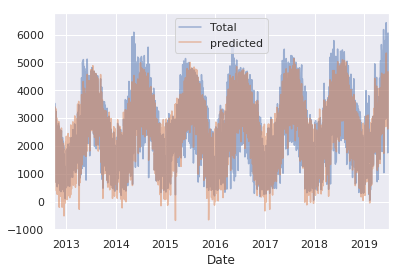

In [0]:
from sklearn.linear_model import LinearRegression

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

daily[['Total', 'predicted']].plot(alpha=0.5);

Here are coefficients of our linear model.

In [0]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              472.562051
Tue              677.815624
Wed              658.769963
Thu              505.487985
Fri              187.045078
Sat            -1168.906823
Sun            -1249.929398
holiday        -1113.753085
daylight_hrs     117.494530
PRCP           -6960.460185
dry day          508.583021
Temp (C)         749.192797
annual            49.203277
dtype: float64

We now use **bootstrapping** technique to get a feeling how uncertain our parameters are.
The basic idea of bootstrapping is that inference about a population from sample data (sample → population) can be modelled by resampling the sample data and performing inference about a sample from resampled data (resampled → sample). As the population is unknown, the true error in a sample statistic against its population value is unknown. In bootstrap-resamples, the 'population' is in fact the sample, and this is known; hence the quality of inference of the 'true' sample from resampled data (resampled → sample) is measurable.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/Dr_Martens,_black,_old.jpg)

We resample our training set (with replacement). Some datapoints will be missing, some will occur twise or tree times, etc. We than fit our model, get the coefficients and calculate their std's.

In [0]:
from sklearn.utils import resample

np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)
print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

              effect  error
Mon            473.0   65.0
Tue            678.0   64.0
Wed            659.0   62.0
Thu            505.0   64.0
Fri            187.0   62.0
Sat          -1169.0   62.0
Sun          -1250.0   62.0
holiday      -1114.0  149.0
daylight_hrs   117.0    7.0
PRCP         -6960.0  455.0
dry day        509.0   25.0
Temp (C)       749.0   32.0
annual          49.0    6.0


We first see that there is a relatively stable trend in the weekly baseline: there are many more riders on weekdays than on weekends and holidays. We see that for each $404$ additional hour of daylight, $129 \pm 9$ more people choose to ride; a temperature increase of one degree Celsius encourages $65 \pm 4$ people to grab their bicycle; a dry day means an average of $546 \pm 33$ more riders; and each inch of precipitation means $665 \pm 62$ more people leave their bike at home. Once all these effects are accounted for, we see a modest increase of $28 \pm 18$ new daily riders each year.


Our model is almost certainly missing some relevant information. For example, nonlinear effects (such as effects of precipitation and cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model. Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday’s numbers, or the effect of an unexpected sunny day after a streak of rainy days). These are all potentially interesting effects, and you now have the tools to begin exploring them if you wish!